In [1]:
import pandas as pd

performance_data = pd.read_csv('performance_data.csv')
submission_template = pd.read_csv('submission_template.csv')
weather_data = pd.read_csv('weather_data.csv')

In [2]:
performance_data.head()

,HYBRID_ID,ENV_ID,HYBRID_MG,ENV_MG,YIELD,YEAR,LAT,LONG,PLANT_DATE,HARVEST_DATE,...,ENV_YIELD_STD,ELEVATION,CLAY,SILT,SAND,AWC,PH,OM,CEC,KSAT
0,H2782,Env_1,0,0,107.9577,2008,49.5,-98.0,2008-05-06,2008-11-03,...,7.591866,870.65,22.7,23.0,54.5,18.65,7.2,6.1,24.2,9.4
1,H2782,Env_2,0,0,85.7498,2008,49.3,-98.1,2008-05-14,2008-10-22,...,7.184953,942.41,22.7,22.0,55.8,18.75,7.3,6.9,25.2,10.2
2,H2240,Env_3,0,0,74.6116,2011,49.3,-98.0,2011-05-17,2011-10-17,...,4.583234,903.46,22.8,21.5,55.8,18.95,7.4,6.7,25.5,9.9
3,H1527,Env_3,0,0,83.8191,2011,49.3,-98.0,2011-05-17,2011-10-17,...,4.583234,903.46,22.8,21.5,55.8,18.95,7.4,6.7,25.5,9.9
4,H1369,Env_3,0,0,81.7917,2011,49.3,-98.0,2011-05-17,2011-10-17,...,4.583234,903.46,22.8,21.5,55.8,18.95,7.4,6.7,25.5,9.9


In [3]:
performance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387427 entries, 0 to 387426
Data columns (total 22 columns):
HYBRID_ID         387427 non-null object
ENV_ID            387427 non-null object
HYBRID_MG         387427 non-null int64
ENV_MG            387427 non-null int64
YIELD             387427 non-null float64
YEAR              387427 non-null int64
LAT               387427 non-null float64
LONG              387427 non-null float64
PLANT_DATE        387427 non-null object
HARVEST_DATE      387427 non-null object
IRRIGATION        379143 non-null object
ENV_YIELD_MEAN    387427 non-null float64
ENV_YIELD_STD     387427 non-null float64
ELEVATION         387427 non-null float64
CLAY              387427 non-null float64
SILT              387427 non-null float64
SAND              387427 non-null float64
AWC               387427 non-null float64
PH                387427 non-null float64
OM                387427 non-null float64
CEC               387427 non-null float64
KSAT              

In [4]:
performance_data.describe()

,HYBRID_MG,ENV_MG,YIELD,YEAR,LAT,LONG,ENV_YIELD_MEAN,ENV_YIELD_STD,ELEVATION,CLAY,SILT,SAND,AWC,PH,OM,CEC,KSAT
count,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000
mean,5.132190,5.480511,120.738228,2012.781236,41.661369,-91.262012,120.291649,13.378154,1159.748470,24.429210,48.748303,26.796305,23.715754,6.397536,5.556450,25.454481,2.367292
std,1.707665,1.800359,21.995931,2.602693,2.360795,5.839294,17.447066,2.975853,702.488253,4.136108,10.626200,12.379756,2.083614,0.375251,2.223076,3.704428,1.672286
min,0.000000,0.000000,6.031800,2008.000000,26.100000,-104.900000,28.077529,2.807647,-2.500000,6.800000,9.300000,0.000000,11.400000,4.700000,1.600000,8.033333,0.500000
25%,4.000000,4.000000,107.817400,2011.000000,40.300000,-95.200000,109.749895,11.588648,754.390000,21.800000,40.500000,17.200000,22.500000,6.200000,4.000000,23.200000,1.200000
50%,5.000000,6.000000,122.128700,2013.000000,41.500000,-91.900000,121.749200,12.949489,1004.810000,24.700000,48.300000,27.000000,24.000000,6.300000,5.000000,25.700000,1.800000
75%,7.000000,7.000000,135.356250,2015.000000,43.300000,-87.600000,131.434895,15.037107,1278.860000,27.200000,57.500000,35.700000,25.350000,6.600000,6.900000,27.700000,3.100000
max,8.000000,9.000000,230.607000,2017.000000,49.500000,-71.500000,181.664953,41.182394,4905.310000,39.500000,72.800000,83.300000,28.250000,7.900000,20.300000,43.200000,14.700000


## Geojson map based on the coordinates of performance_data

In [5]:
# Import modules
#joined_df
import geojsonio
import json

# Get data for map
map_data = performance_data.groupby(by=['LONG','LAT']).size()
map_df = pd.DataFrame(map_data)
map_df = map_df.reset_index()
map_df.columns = ['LONG','LAT','COUNT']


# Build geojson dictionary    
map_geojson = { "type" : "FeatureCollection",
           "features": []}
for i in range(len(map_df)):
    dict_iter = {'type':'Feature',
                'geometry':{'type':'Point','coordinates':[map_df.iloc[i]['LONG'],map_df.iloc[i]['LAT']]},
                'properties':{'crop count':map_df.iloc[i]['COUNT']}}
    map_geojson['features'].append(dict_iter)
geojsonio.display(json.dumps(map_geojson))


'http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22FeatureCollection%22%2C%20%22features%22%3A%20%5B%7B%22type%22%3A%20%22Feature%22%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Point%22%2C%20%22coordinates%22%3A%20%5B-104.9%2C%2040.3%5D%7D%2C%20%22properties%22%3A%20%7B%22crop%20count%22%3A%20618.0%7D%7D%2C%20%7B%22type%22%3A%20%22Feature%22%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Point%22%2C%20%22coordinates%22%3A%20%5B-104.8%2C%2040.4%5D%7D%2C%20%22properties%22%3A%20%7B%22crop%20count%22%3A%20375.0%7D%7D%2C%20%7B%22type%22%3A%20%22Feature%22%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Point%22%2C%20%22coordinates%22%3A%20%5B-104.7%2C%2040.3%5D%7D%2C%20%22properties%22%3A%20%7B%22crop%20count%22%3A%20214.0%7D%7D%2C%20%7B%22type%22%3A%20%22Feature%22%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Point%22%2C%20%22coordinates%22%3A%20%5B-103.4%2C%2041.8%5D%7D%2C%20%22properties%22%3A%20%7B%22crop%20count%22%3A%20319.0%7D%7D%2C%20%7B%22type%22%3A%20%22Feat

## Binning function

In [6]:
# Extract average weather metrics for every ENV_ID
weather_grouped = weather_data.groupby(by='ENV_ID').mean()
weather_grouped = weather_grouped.drop('DAY_NUM', axis='columns')

# Join dataframes on 'ENV_ID'
joined_df = performance_data.join(weather_grouped,on='ENV_ID')


factor_df = joined_df[['LONG', 'LAT', 'PREC', 'TMAX', 'TMIN']].drop_duplicates()
#determine min, mean, max
#segment factor from 1 to 4

def factor_seg(df, factor):
    min_ = factor_df[factor].min()
    max_ = factor_df[factor].max()
    mean_ = factor_df[factor].mean()
    #binning
    diff = (max_ - min_)/4
    b_l = list()
    for x in range(len(df)):
        temp = 0
        if df.iloc[x][factor] < (min_ + diff):
            temp = 1
        elif df.iloc[x][factor] < (min_ + 2*diff):
            temp = 2
        elif df.iloc[x][factor] < (min_ + 3*diff):
            temp = 3
        else:
            temp = 4
        b_l.append(temp)
    df.insert(loc=0, column=factor + '_binning', value=b_l)
    return df
test_df = factor_seg(factor_df, 'PREC')
#test_df
#test_df.loc[:, 'PREC_binning']

## Folium map with popup markers for every coordinate pair

In [7]:
#folium map
#For every coordinate pair: a popup shows values for 'PREC', 'IRR', 'ELEVATION', 'TMAX', 'TMIN'
import folium
m = folium.Map(location=[39, -96], zoom_start=5, tiles='Stamen Terrain')
folium_data = joined_df[['LONG', 'LAT', 'PREC','IRRIGATION', 'ELEVATION', 'TMAX', 'TMIN']].drop_duplicates()
folium
for x in range(len(folium_data)):
    folium.Marker([folium_data.iloc[x]['LAT'], folium_data.iloc[x]['LONG']], popup=(f"""Prec: {folium_data.iloc[x]['PREC']:.2f} IRR: {folium_data.iloc[x]['IRRIGATION']} Elev: {folium_data.iloc[x]['ELEVATION']:.0f} Tmax: {folium_data.iloc[x]['TMAX']:.2f} Tmin: {folium_data.iloc[x]['TMIN']:.2f}""")).add_to(m)
m


## Correlation heatmap
There are no strong correlations between weather conditions and yield if we look at the aggregated data. We can conclude we'll have to go one level deeper and do the analysis on every specific Hybrid_ID

In [8]:
# Import modules
import seaborn as sns
import numpy as np

# Prepare dataframe to redo correlation matrix
joined_df_drop = joined_df.drop(['HYBRID_ID','ENV_ID','ENV_YIELD_MEAN','ENV_YIELD_STD'],axis='columns')
corr_matrix_joined = joined_df_drop.corr()

# Draw heatmap
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix_joined,cmap='BuGn')
top_5 = corr_matrix_joined['YIELD'].sort_values(ascending=False).iloc[1:6]
bottom_5 = corr_matrix_joined['YIELD'].sort_values(ascending=True).iloc[0:5]
print(top_5,bottom_5)

HYBRID_MG    0.219539
YEAR         0.208669
ENV_MG       0.162916
SRAD         0.161162
ELEVATION    0.154716
Name: YIELD, dtype: float64 OM     -0.163030
LONG   -0.141509
SWE    -0.115704
LAT    -0.103775
SAND   -0.073778
Name: YIELD, dtype: float64


## Focusing on only strongly correlated variables for drought and/or heat variables

In [9]:
# Import modules
import numpy as np
weather_data_grouped_mean = weather_data.groupby(by='ENV_ID').mean()
weather_data_grouped_std = weather_data.groupby(by='ENV_ID').std()
weather_data_grouped_mean.head()
weather_data_grouped_std.head()
weather_data_grouped = weather_data_grouped_mean.join(weather_data_grouped_std,
                                                      lsuffix='_AVG',
                                                     rsuffix='_STD')
weather_data_grouped = weather_data_grouped.drop('DAY_NUM_AVG',axis=1)
weather_data_grouped.head()
weather_data.head()

# Join dataframes on 'ENV_ID'
joined_df = performance_data.join(weather_data_grouped,on='ENV_ID')

In [10]:
# Heat stress variables
heat_stress_df = joined_df[['ENV_ID','HYBRID_ID', 'YIELD', 'ENV_YIELD_MEAN','ENV_YIELD_STD','TMAX_AVG','TMAX_STD','DAYL_AVG','DAYL_STD',
                           'SRAD_AVG','SRAD_STD']]
# Drought stress variables
drought_stress_df = joined_df[['HYBRID_ID','ENV_ID','YIELD', 'ENV_YIELD_MEAN','ENV_YIELD_STD','IRRIGATION','PREC_AVG','PREC_STD','KSAT',
                              'SWE_AVG','SWE_STD','VP_AVG','VP_STD','AWC']]

# Heat stress variables

YIELD       1.000000
SRAD_AVG    0.161162
TMAX_AVG    0.081646
DAYL_AVG    0.003500
TMAX_STD   -0.064415
DAYL_STD   -0.116823
SRAD_STD   -0.160375
Name: YIELD, dtype: float64


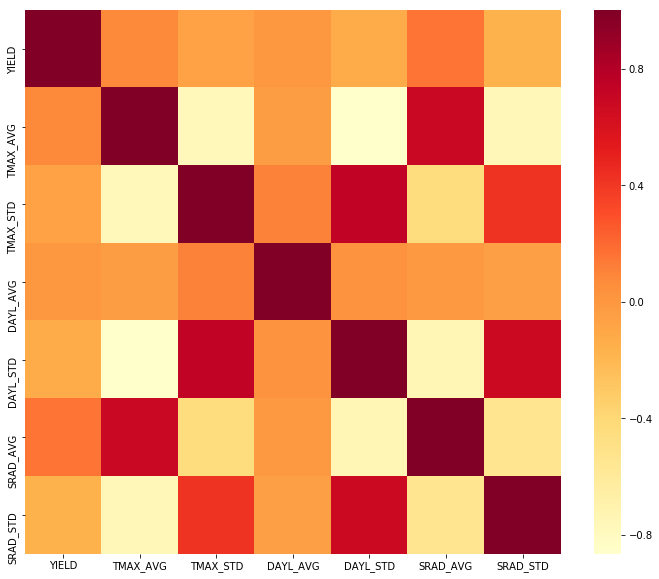

In [11]:
# Heat stress variables to yield correlation
# Import modules
import seaborn as sns
import numpy as np

# Prepare dataframe to redo correlation matrix
heat_stress_df_drop = heat_stress_df.drop(['HYBRID_ID','ENV_ID','ENV_YIELD_MEAN','ENV_YIELD_STD'],axis='columns')
corr_matrix_heat = heat_stress_df_drop.corr()

# Draw heatmap
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix_heat,cmap='YlOrRd')

print(corr_matrix_heat['YIELD'].sort_values(ascending=False))
#corr_matrix_heat['YIELD'].sort_values(ascending=True)

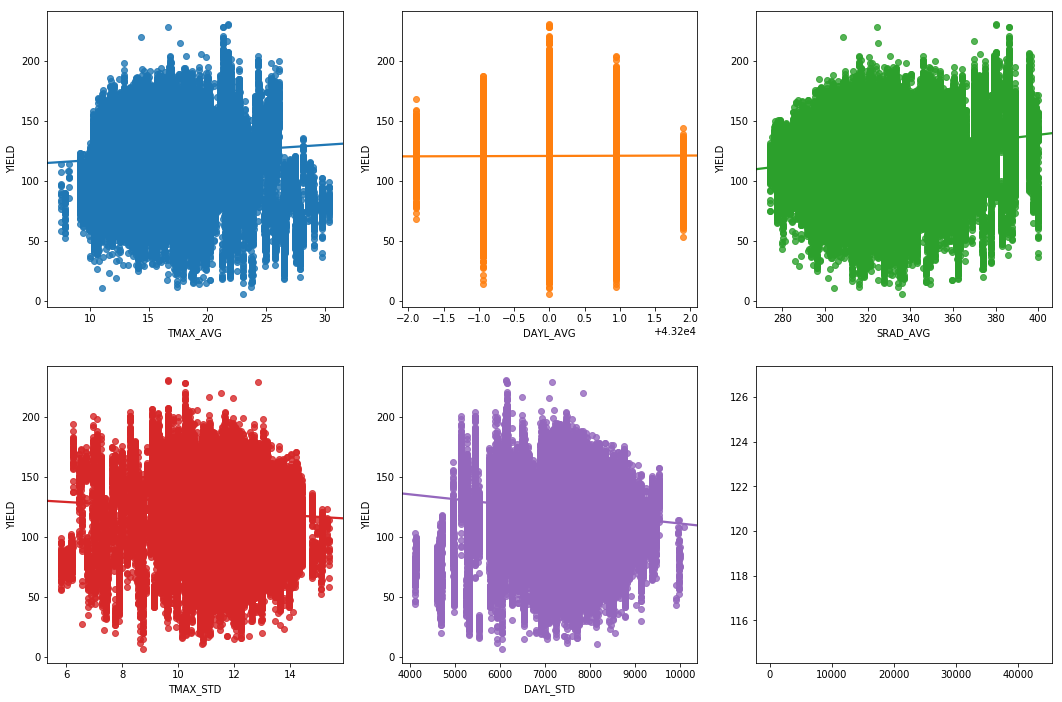

In [12]:
heat_stress_features_list = ['TMAX_AVG','DAYL_AVG','SRAD_AVG', 'TMAX_STD', 'DAYL_STD','SRAD_STD']

#heat_stress_df_drop = df[heat_stress_features_list]
#heat_stress_features = [x for x in heat_stress_features_list]

fig, ax = plt.subplots(round(len(heat_stress_features_list) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(heat_stress_features_list) - 1:
        sns.regplot(x=heat_stress_features_list[i],y='YIELD', data=heat_stress_df_drop, ax=ax)

In [13]:
joined_df.columns

Index(['HYBRID_ID', 'ENV_ID', 'HYBRID_MG', 'ENV_MG', 'YIELD', 'YEAR', 'LAT',
       'LONG', 'PLANT_DATE', 'HARVEST_DATE', 'IRRIGATION', 'ENV_YIELD_MEAN',
       'ENV_YIELD_STD', 'ELEVATION', 'CLAY', 'SILT', 'SAND', 'AWC', 'PH', 'OM',
       'CEC', 'KSAT', 'DAYL_AVG', 'PREC_AVG', 'SRAD_AVG', 'SWE_AVG',
       'TMAX_AVG', 'TMIN_AVG', 'VP_AVG', 'DAY_NUM_STD', 'DAYL_STD', 'PREC_STD',
       'SRAD_STD', 'SWE_STD', 'TMAX_STD', 'TMIN_STD', 'VP_STD'],
      dtype='object')

# Drought stress variables

YIELD       1.000000
PREC_STD    0.094834
VP_STD      0.061880
AWC         0.024275
PREC_AVG    0.005352
VP_AVG     -0.025146
KSAT       -0.028893
SWE_STD    -0.106854
SWE_AVG    -0.115704
Name: YIELD, dtype: float64


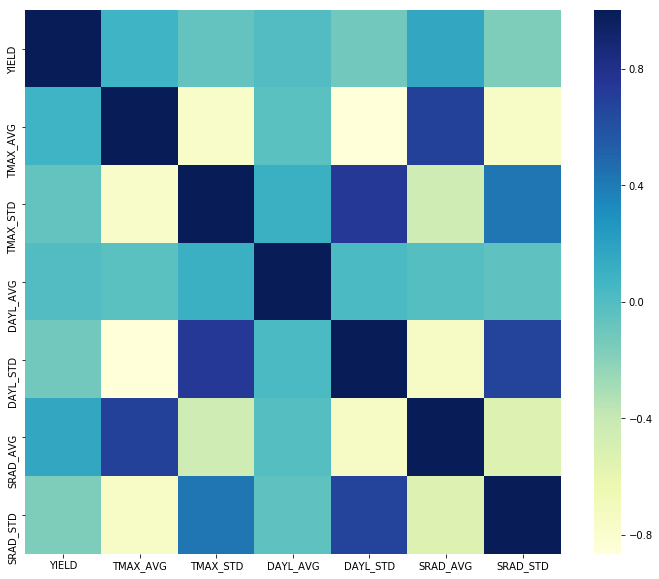

In [14]:
# Drought stress variables to yield correlation
# Import modules
import seaborn as sns
import numpy as np

# Prepare dataframe to redo correlation matrix
drought_stress_df_drop = drought_stress_df.drop(['HYBRID_ID','ENV_ID','ENV_YIELD_MEAN','ENV_YIELD_STD'],axis='columns')
corr_matrix_drought = drought_stress_df_drop.corr()

# Draw heatmap
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix_heat,cmap='YlGnBu')

print(corr_matrix_drought['YIELD'].sort_values(ascending=False))
#corr_matrix_drought['YIELD'].sort_values(ascending=True)

In [ ]:
# Correlation between each drought variable and yield
drought_stress_features_list = ['PREC_STD','VP_STD','AWC', 'PREC_AVG','VP_AVG','KSAT','SWE_STD','SWE_AVG']

fig, ax = plt.subplots(round(len(drought_stress_features_list) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(drought_stress_features_list) - 1:
        sns.regplot(x=drought_stress_features_list[i],y='YIELD', data=drought_stress_df_drop, ax=ax)